In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tqdm.auto as tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modular_splicing.motif_names import get_motif_names
from modular_splicing.utils.plots.plot_psam import render_psams

from modular_splicing.difference_between_motifs.difference_classifier import (
    full_psam_difference_analysis,
    render_difference_model,
)

from modular_splicing.difference_between_motifs.renderer import (
    cross_classify,
    display_difference,
)

from modular_splicing.models_for_testing.list import AM, FM

Matplotlib is building the font cache; this may take a moment.


In [4]:
w = 21

In [5]:
models = {
    "AM_1": AM.non_binarized_model(1).model,
    "AM_2": AM.non_binarized_model(2).model,
    "FM_1": FM.non_binarized_model(1).model,
}

In [6]:
names = get_motif_names("rbns")

In [7]:
results, matches_test, amount = full_psam_difference_analysis(models, "FM_1", ["AM_1", "AM_2"], w=w)

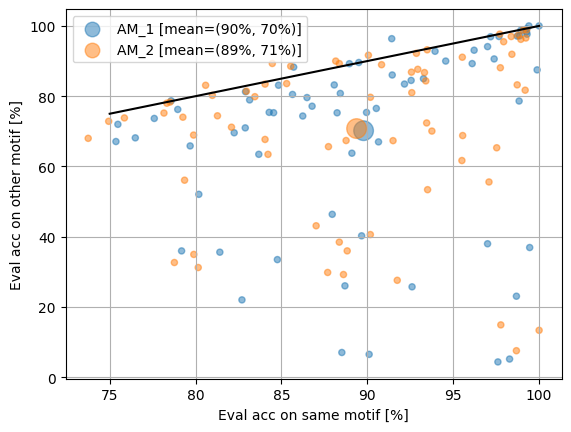

In [8]:
cross_classify(results)

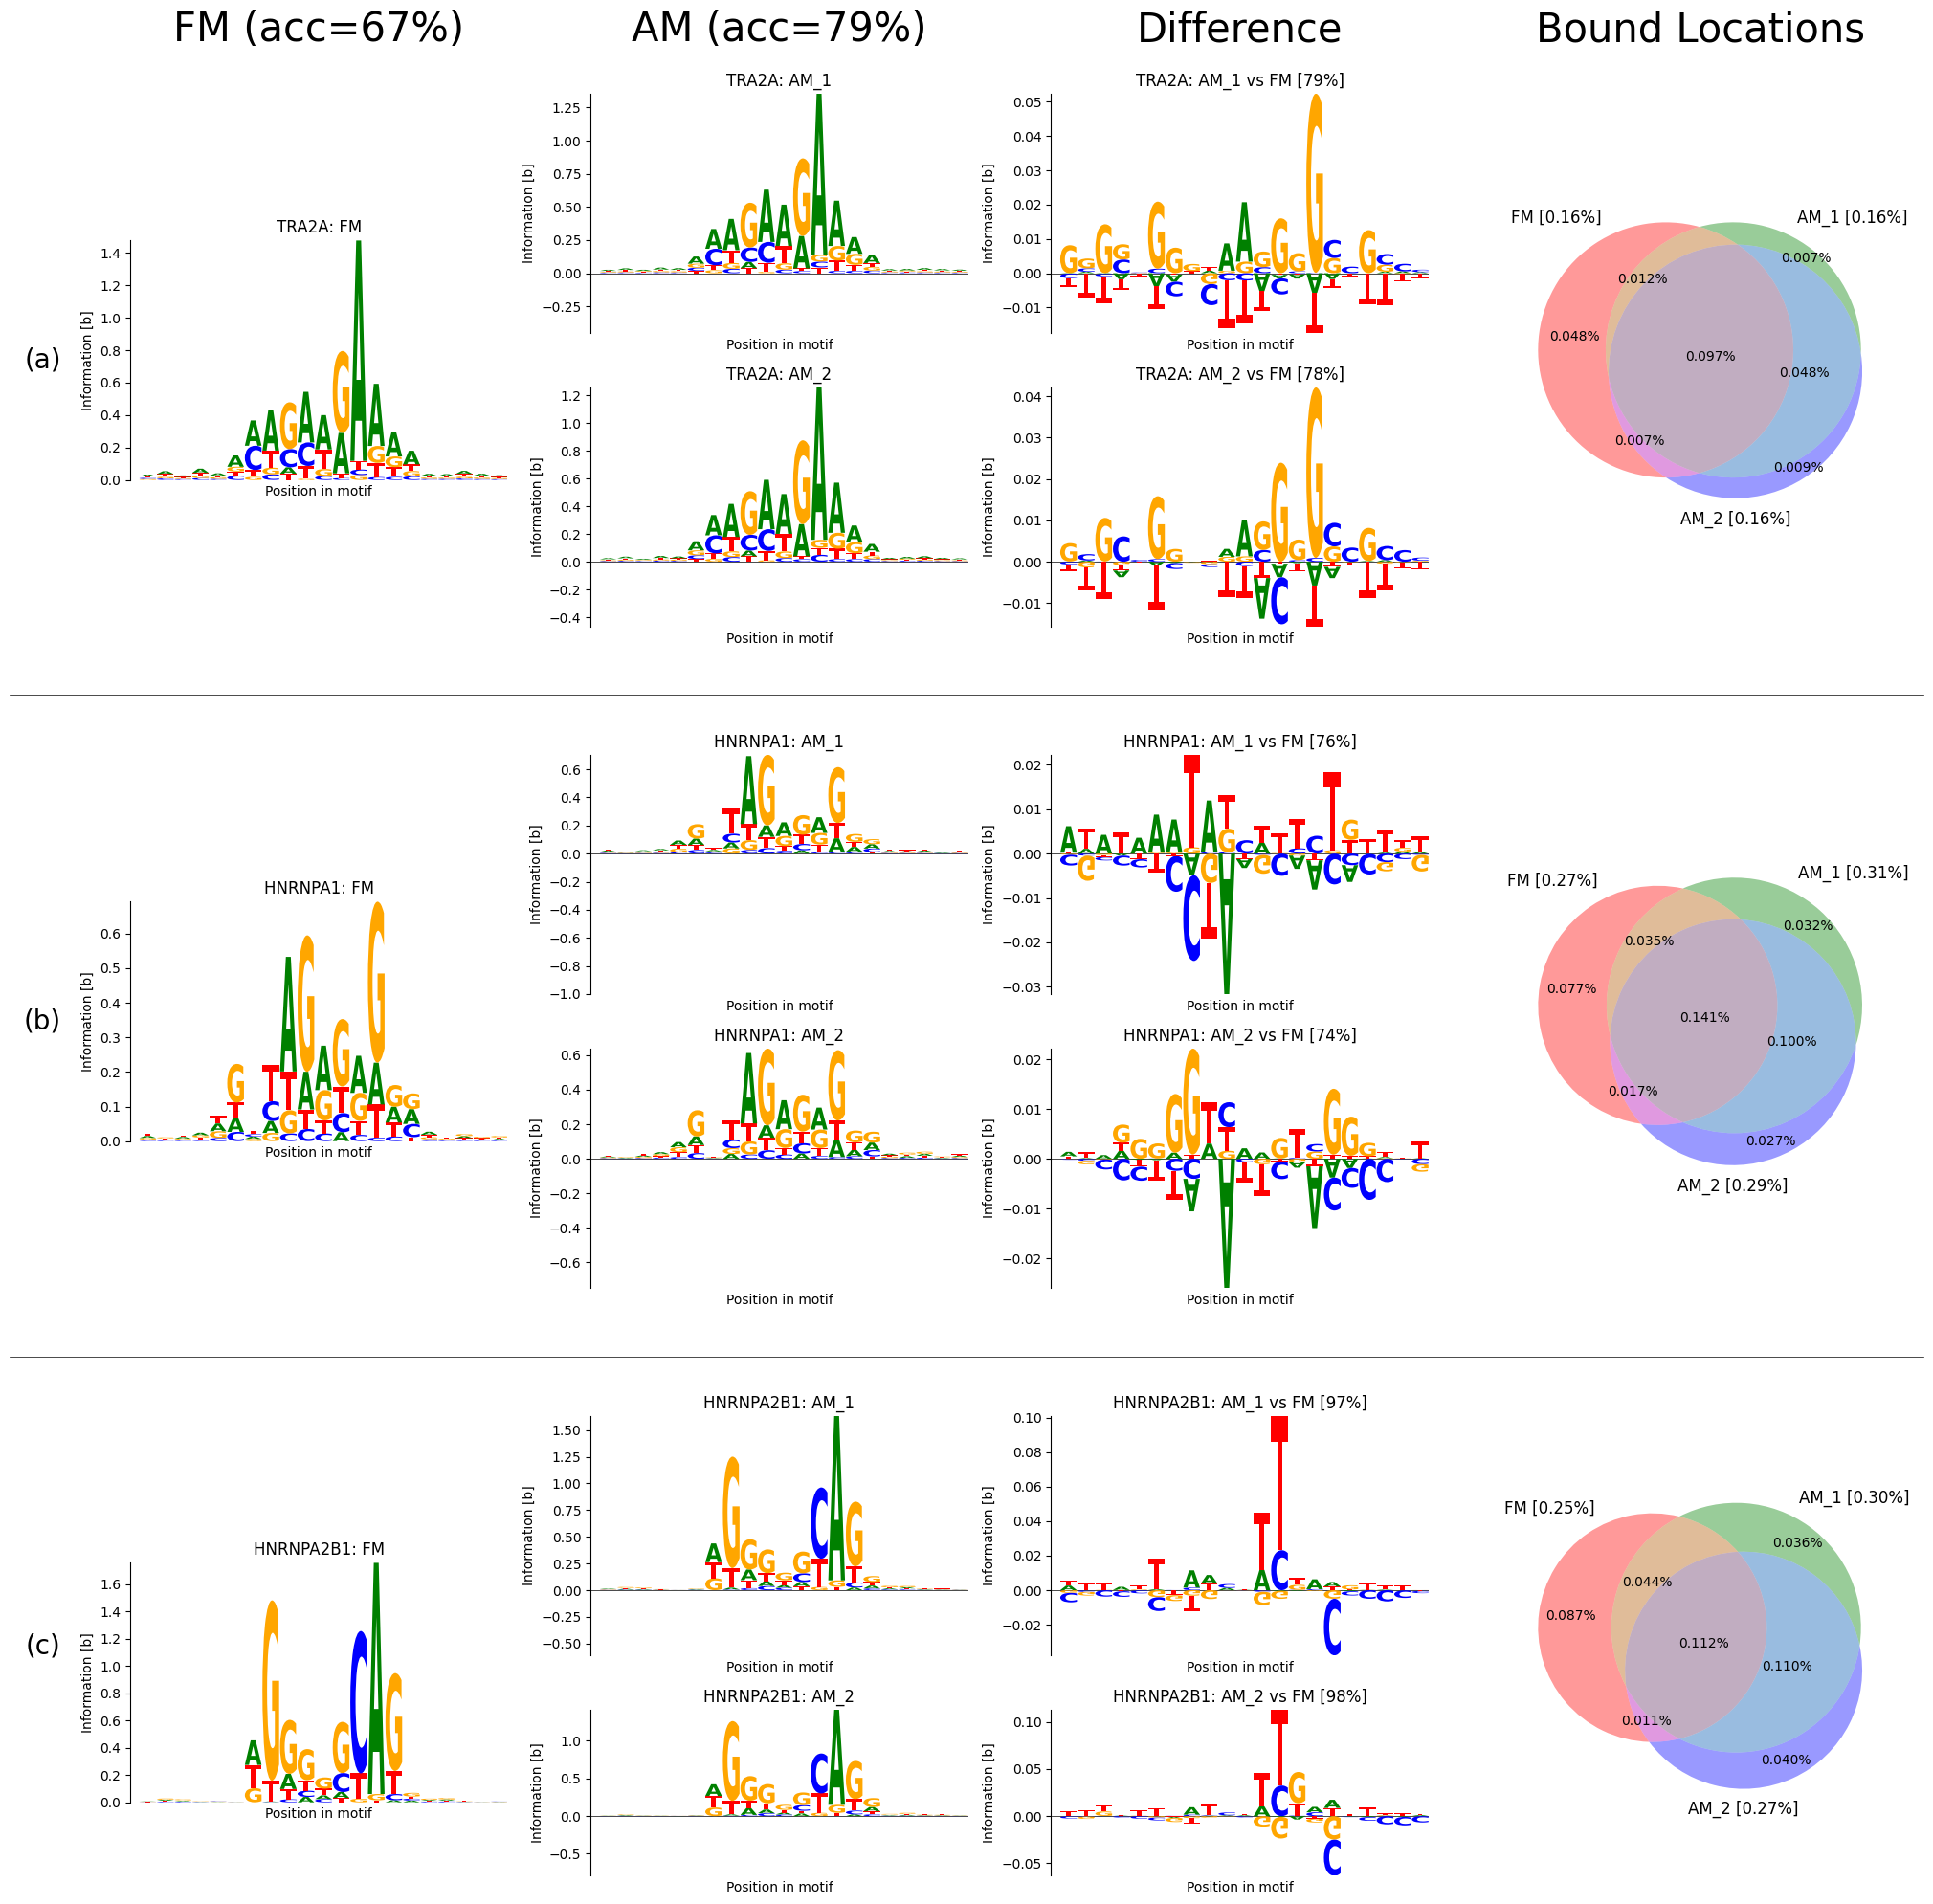

In [9]:
display_difference(
    results,
    matches_test,
    amount,
    motif_names=names,
    motifs_to_use=["TRA2A", "HNRNPA1", "HNRNPA2B1"],
    difference_mode="individual_contributions",
)
plt.savefig("../../biology-paper-1/difference-between-psams.png")

In [10]:
for k, result in results.items():
    for name, res in tqdm.tqdm(list(zip(names, result))):
        path = (
            f"output-csvs/psams/difference-between-psams-discriminator/{k}_{name}.png"
        )
        if os.path.exists(path):
            continue
        p, n = render_difference_model(f"{k}/{name}", res, w)
        render_psams(p, names=n)
        plt.savefig(path, facecolor="white")
        plt.close()

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]